# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Churn Prediction</p>

## Customer churn prediction is the practice of analyzing data to detect customers who are likely to cancel their subscriptions

## <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Let's import what we need</p>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer , make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report
import pycaret
import seaborn as sns
import warnings
warnings. filterwarnings('ignore')
import time
import imblearn
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.cbook import boxplot_stats
from matplotlib import cbook
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

## <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Load the dataset</p>

In [5]:
df = pd.read_csv('IT_customer_churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Let's do some EDA</p>

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Cleaning</p>

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [11]:
index_list = df[df['TotalCharges'].isin([' '])].index
index_list

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [12]:
df.drop(index=index_list,inplace=True)


In [13]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [15]:
df.reset_index(inplace=True)


In [16]:
df.drop(["index"], axis=1, inplace = True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
TotalCH_Age_mean_df = df.groupby( 'gender' )['TotalCharges'].mean().reset_index()
TotalCH_Age_mean_df

,gender,TotalCharges
0,Female,2283.190985
1,Male,2283.407861


In [19]:
MonthlyCh_Age_mean_df = df.groupby( 'gender' )['MonthlyCharges'].mean().reset_index()
MonthlyCh_Age_mean_df


,gender,MonthlyCharges
0,Female,65.216652
1,Male,64.387546


In [20]:
tenure_Age_mean_df = df.groupby( 'gender' )['tenure'].mean().reset_index()
tenure_Age_mean_df


,gender,tenure
0,Female,32.290841
1,Male,32.550296


In [21]:
df['Churn'].value_counts(normalize=True)* 100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [22]:
df['gender'].value_counts(normalize=True)* 100

Male      50.469283
Female    49.530717
Name: gender, dtype: float64

In [23]:
gender_Churn_mean_df = df.groupby( ['gender'] )['Churn'].value_counts(normalize=True)* 100
gender_Churn_mean_df

gender  Churn
Female  No       73.040482
        Yes      26.959518
Male    No       73.795435
        Yes      26.204565
Name: Churn, dtype: float64

In [24]:
gender_Pmethod_mean_df = df.groupby( ['gender'] )['PaymentMethod'].value_counts(normalize=True)* 100
gender_Pmethod_mean_df


gender  PaymentMethod            
Female  Electronic check             33.591731
        Bank transfer (automatic)    22.595464
        Mailed check                 22.250933
        Credit card (automatic)      21.561872
Male    Electronic check             33.671457
        Mailed check                 23.358693
        Credit card (automatic)      21.696252
        Bank transfer (automatic)    21.273598
Name: PaymentMethod, dtype: float64

In [25]:
gender_Contract_mean_df = df.groupby( ['gender'] )['Contract'].value_counts(normalize=True)* 100
gender_Contract_mean_df

gender  Contract      
Female  Month-to-month    55.268447
        Two year          24.117140
        One year          20.614413
Male    Month-to-month    54.945055
        Two year          23.809524
        One year          21.245421
Name: Contract, dtype: float64

In [26]:
# Filtering the features with 0 variance
no_var = df.var() == 0
df.var()[no_var]

Series([], dtype: float64)

In [27]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_TotalCharges, upper_TotalCharges = lower_upper(df['TotalCharges'])
lower_MonthlyCharges, upper_MonthlyCharges = lower_upper(df['MonthlyCharges'])
lower_tenure, upper_tenure = lower_upper(df['tenure'])

print(f"Lower limit for TotalCharges: {lower_TotalCharges:0.2f}")
print(f"Upper limit for TotalCharges: {upper_TotalCharges:0.2f}")
print(f"Lower limit for MonthlyCharges: {lower_MonthlyCharges:,}")
print(f"Upper limit for MonthlyCharges: {upper_MonthlyCharges:,}")
print(f"Lower limit for tenure: {lower_tenure:,}")
print(f"Upper limit for tenure: {upper_tenure:,}")

Lower limit for TotalCharges: -4688.48
Upper limit for TotalCharges: 8884.67
Lower limit for MonthlyCharges: -45.824999999999996
Upper limit for MonthlyCharges: 171.27499999999998
Lower limit for tenure: -60.0
Upper limit for tenure: 124.0


In [28]:
TotalCharges_outliers = np.where(df['TotalCharges'] > upper_TotalCharges)
MonthlyCharges_outliers = np.where(df['MonthlyCharges'] > upper_MonthlyCharges)
tenure_outliers = np.where(df['tenure'] > upper_tenure)
# Return the unique, sorted array of values that are in either of the two input arrays.
#total_outliers = np.union1d(TotalCharges_outliers, MonthlyCharges_outliers,tenure_outliers)

print(f"Number of area TotalCharges: {len(df.iloc[TotalCharges_outliers])}")
print(f"Number of MonthlyCharges outliers: {len(df.iloc[MonthlyCharges_outliers])}")
print(f"Number of tenure outliers: {len(df.iloc[tenure_outliers])}")
#print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area TotalCharges: 0
Number of MonthlyCharges outliers: 0
Number of tenure outliers: 0


In [31]:
def df_uniqe_col_value(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f'{column} : {df[column].unique()}')

In [32]:
df_uniqe_col_value(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [33]:
df = df.replace('No internet service',"No")


In [34]:
df = df.replace('No phone service',"No")

In [35]:
df_uniqe_col_value(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [36]:
for col in df:
    print(f'{col} : {df[col].unique()}')
    

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [37]:
yes_no_columns= ["PaperlessBilling","StreamingMovies", "StreamingTV","TechSupport","DeviceProtection","OnlineBackup",
                 "OnlineSecurity", "MultipleLines","PhoneService","PhoneService", "Dependents", "Partner","Churn"]
for col in yes_no_columns:
    df[col].replace({"Yes":1 , "No":0},inplace=True)

In [38]:
df.gender.replace({"Male":1 , "Female":0},inplace=True)

In [39]:
categorical_pipeline = Pipeline([('OneHot', OneHotEncoder(handle_unknown='ignore'))])
transformer = ColumnTransformer([('cat', categorical_pipeline, ['PaymentMethod','Contract','InternetService'])])

In [40]:
for col in df:
    print(f'{col} : {df[col].unique()}')
    

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [41]:
df.shape

(7032, 20)

In [42]:
df=pd.get_dummies(df, columns=["InternetService","Contract","PaymentMethod"])

In [43]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [44]:
cols_to_scale=["tenure","TotalCharges","MonthlyCharges"]
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [45]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


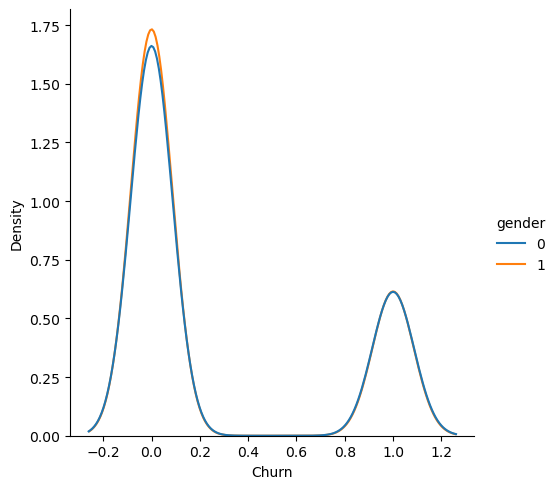

In [46]:
sns.displot(df, x="Churn", hue='gender',kind="kde")

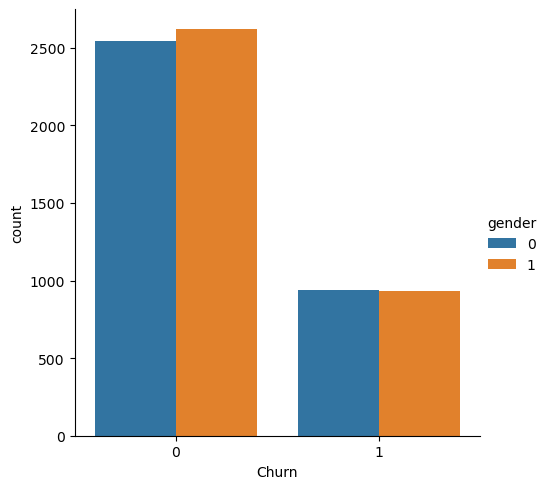

In [47]:
sns.catplot( x="Churn", hue='gender',kind="count", data=df)

In [48]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

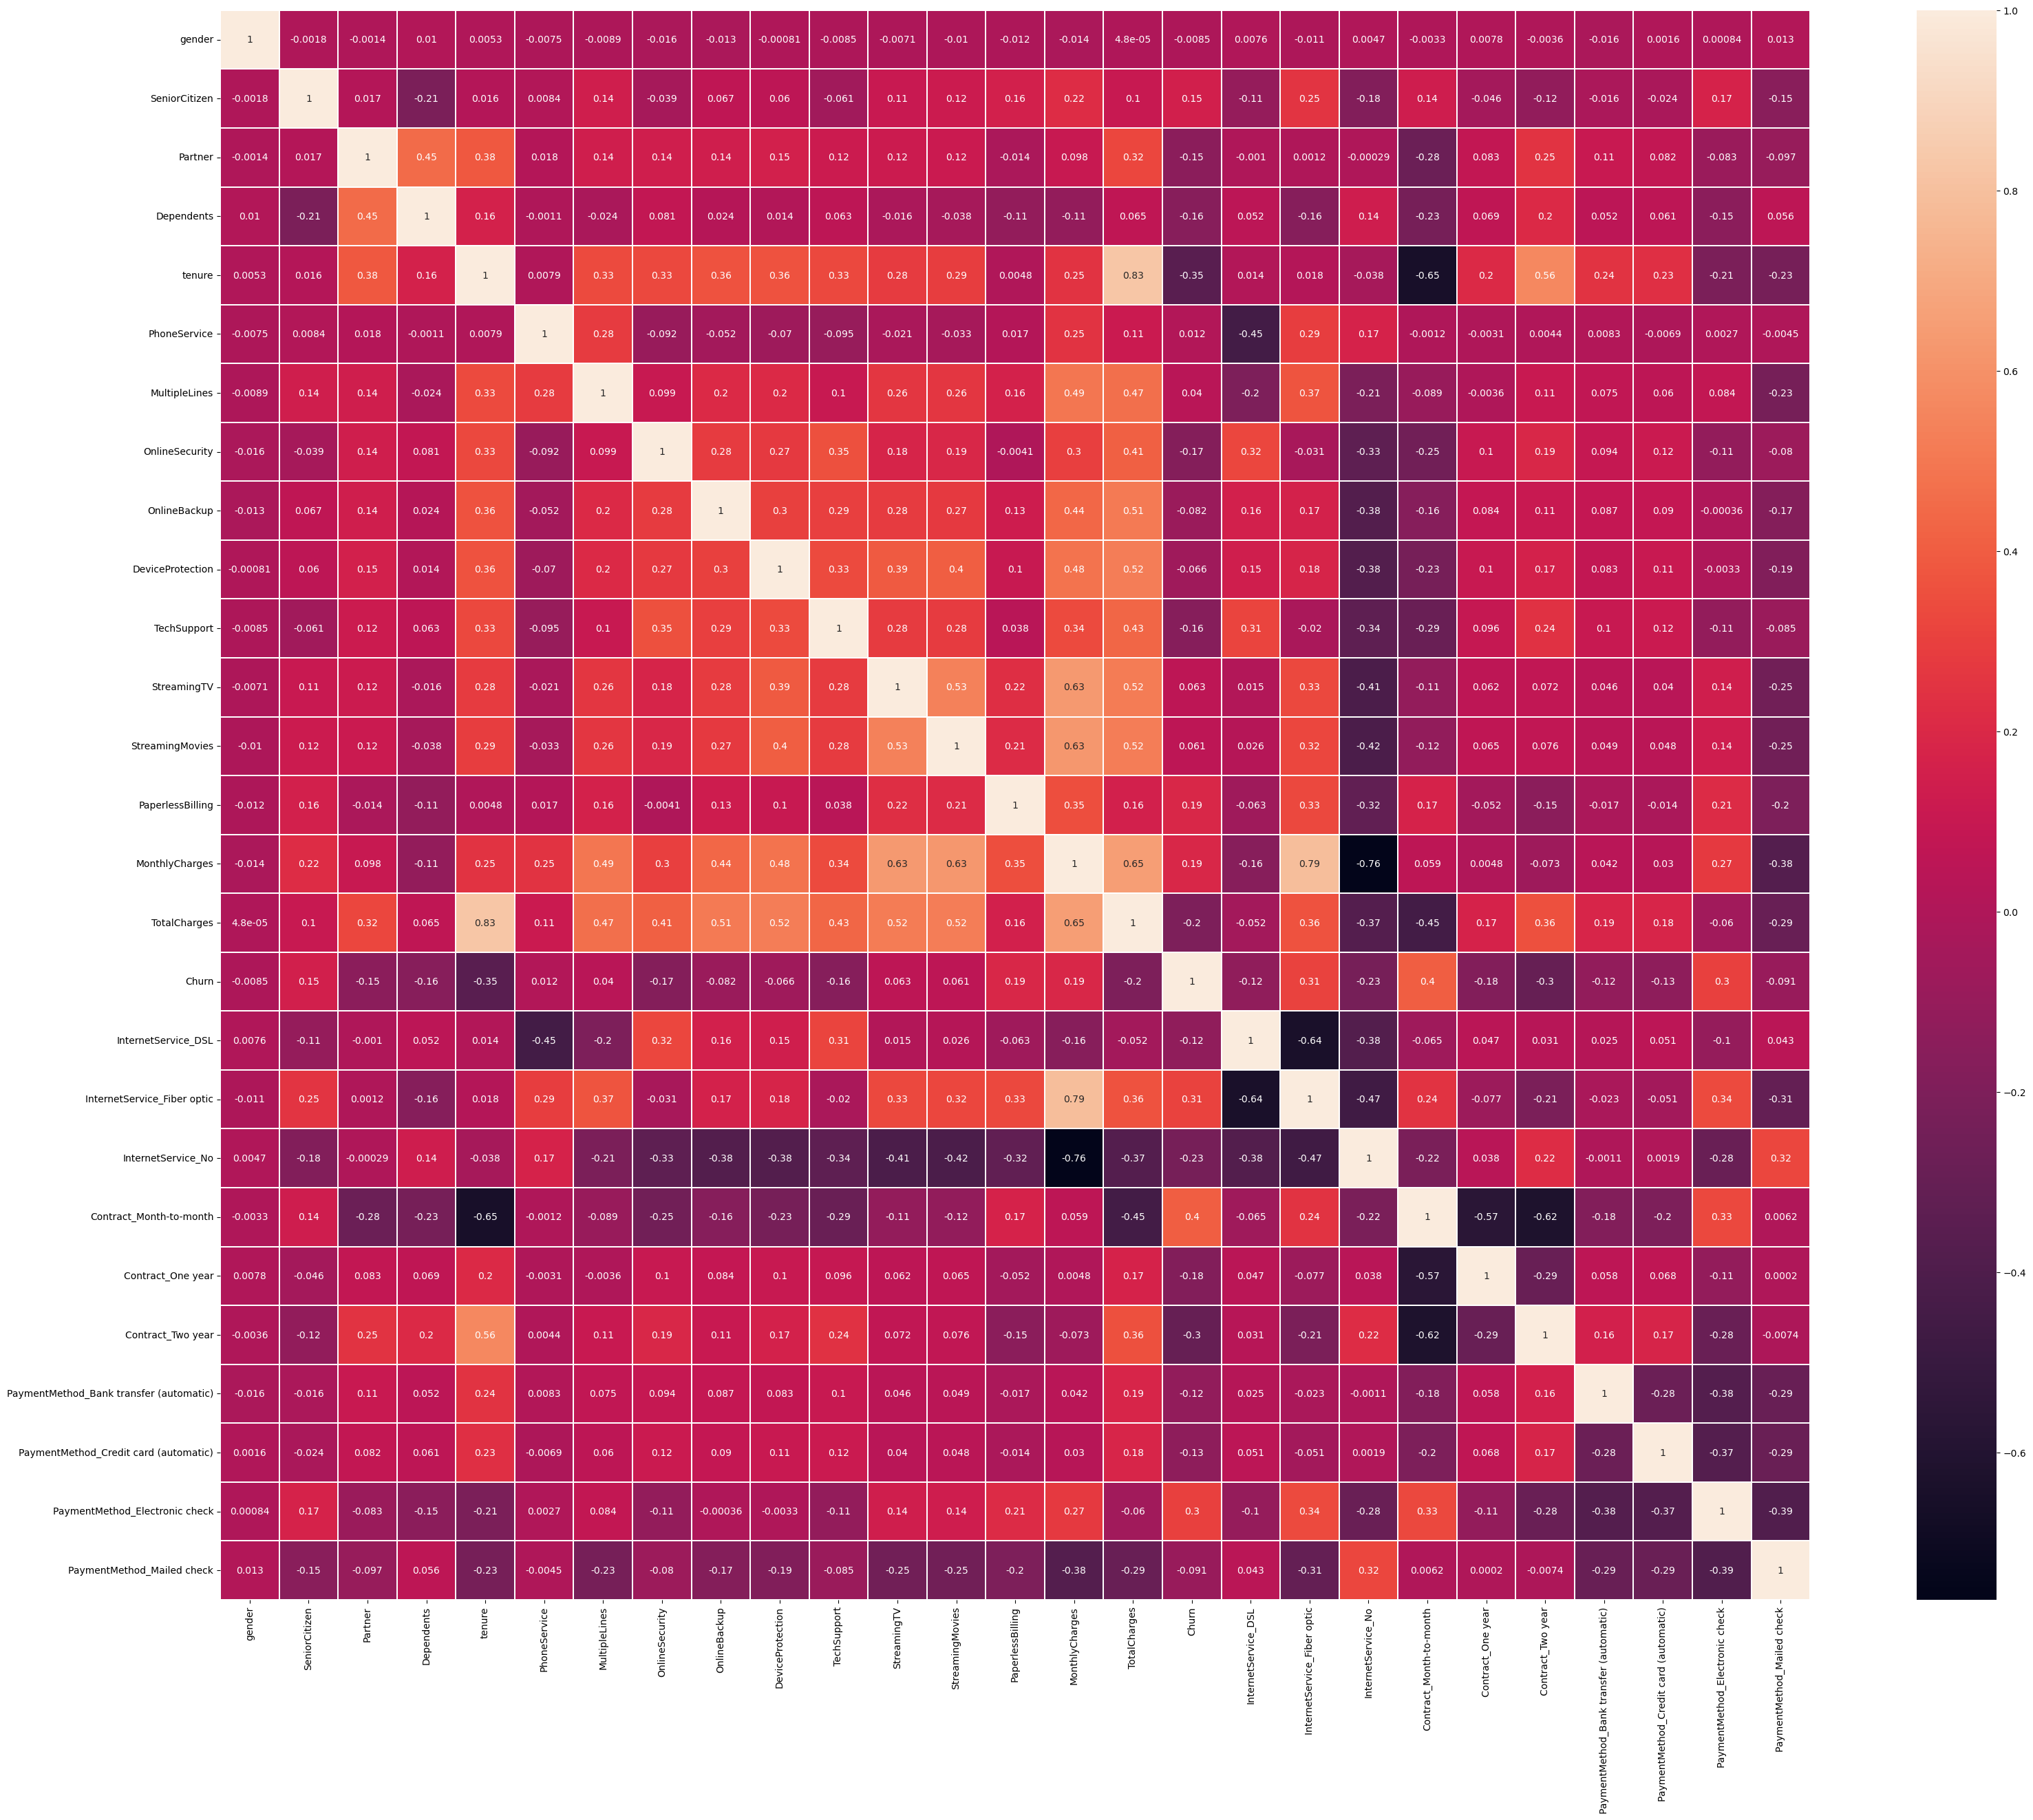

In [49]:
my_correlation = df.corr()
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(my_correlation,annot=True,square=True, fmt='0.02g',linewidths =0.2)
plt.show()

In [52]:
soretd_corr=my_correlation.sort_values(by=['Churn'],key=abs)


In [53]:
soretd_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
StreamingMovies,-0.010105,0.119842,0.118108,-0.038375,0.285402,-0.033477,0.259194,0.187426,0.274523,0.402309,...,0.025623,0.322457,-0.418450,-0.117867,0.064780,0.075603,0.048755,0.048398,0.137420,-0.250290
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,0.280264,-0.021383,0.257804,0.175514,0.281601,0.389924,...,0.014973,0.329744,-0.414951,-0.112550,0.061930,0.072124,0.046121,0.040010,0.144747,-0.247712
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
PaymentMethod_Mailed check,0.013199,-0.152987,-0.096948,0.056448,-0.232181,-0.004463,-0.227672,-0.079918,-0.174075,-0.187325,...,0.042754,-0.305984,0.319694,0.006209,0.000197,-0.007423,-0.288097,-0.285583,-0.386971,1.000000
PaymentMethod_Bank transfer (automatic),-0.015973,-0.016235,0.111406,0.052369,0.243822,0.008271,0.075429,0.094366,0.086942,0.083047,...,0.024760,-0.022779,-0.001094,-0.180159,0.057629,0.155004,1.000000,-0.278423,-0.377270,-0.288097
InternetService_DSL,0.007584,-0.108276,-0.001043,0.051593,0.013786,-0.452255,-0.200318,0.320343,0.156765,0.145150,...,1.000000,-0.641636,-0.379912,-0.065226,0.047300,0.030924,0.024760,0.051222,-0.104293,0.042754


In [55]:
my_correlation['gender']

gender                                     1.000000
SeniorCitizen                             -0.001819
Partner                                   -0.001379
Dependents                                 0.010349
tenure                                     0.005285
PhoneService                              -0.007515
MultipleLines                             -0.008883
OnlineSecurity                            -0.016328
OnlineBackup                              -0.013093
DeviceProtection                          -0.000807
TechSupport                               -0.008507
StreamingTV                               -0.007124
StreamingMovies                           -0.010105
PaperlessBilling                          -0.011902
MonthlyCharges                            -0.013779
TotalCharges                               0.000048
Churn                                     -0.008545
InternetService_DSL                        0.007584
InternetService_Fiber optic               -0.011189
InternetServ

In [56]:
df.drop('gender', axis=1, inplace=True)

In [57]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Use automl solutions to see what is going on. I chose Pycaret</p>

### I use 4 methods to tackle imbalanced data:
* Method_1 is under-sampling
* Method_2 is over-sampling
* Method_3 is SMOTE with 2 PCA component
* Method_4 is Aouto SMOTE

In [59]:
from pycaret.classification import *

# Method_1

In [60]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()

# Divide by class
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


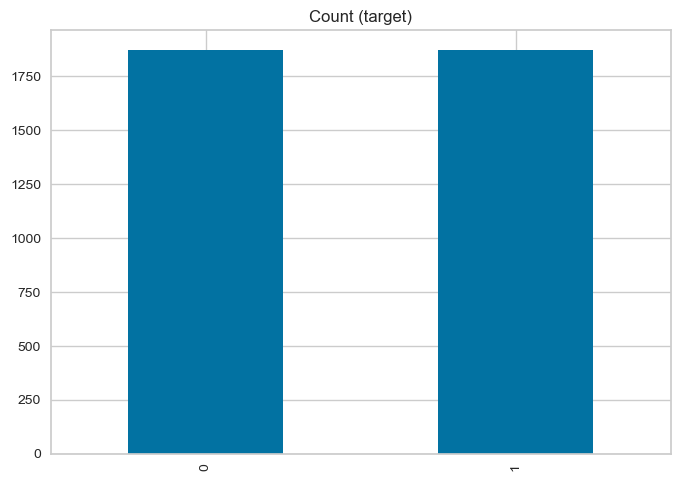

In [61]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.Churn.value_counts())

df_under.Churn.value_counts().plot(kind='bar', title='Count (target)');

In [62]:
df_under.reset_index(inplace=True)

In [63]:
df_under.drop(["index"], axis=1, inplace = True)

In [64]:
X_u = df_under.drop(columns = 'Churn')
y_u = df_under['Churn']

In [65]:
setup(data = X_u,target = y_u ,session_id = 123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3738, 26)"
4,Transformed data shape,"(3738, 26)"
5,Transformed train set shape,"(2616, 26)"
6,Transformed test set shape,"(1122, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [66]:
best = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7714,0.8389,0.8043,0.7552,0.7787,0.5429,0.5444,0.8440
lr,Logistic Regression,0.7664,0.8420,0.7982,0.7517,0.7737,0.5329,0.5348,6.6350
gbc,Gradient Boosting Classifier,0.7622,0.8406,0.7959,0.7466,0.7702,0.5245,0.5261,0.9030
lda,Linear Discriminant Analysis,0.7607,0.8394,0.7989,0.7438,0.7698,0.5214,0.5237,0.7860
ridge,Ridge Classifier,0.7599,0.0000,0.7982,0.7430,0.7691,0.5199,0.5221,0.8520
catboost,CatBoost Classifier,0.7599,0.8367,0.7852,0.7483,0.7660,0.5199,0.5210,3.6550
nb,Naive Bayes,0.7534,0.8268,0.8096,0.7286,0.7667,0.5069,0.5104,0.7700
svm,SVM - Linear Kernel,0.7401,0.0000,0.8165,0.7134,0.7564,0.4801,0.4942,0.7650
rf,Random Forest Classifier,0.7378,0.8227,0.7462,0.7351,0.7402,0.4755,0.4762,1.6470
lightgbm,Light Gradient Boosting Machine,0.7362,0.8234,0.7516,0.7303,0.7403,0.4725,0.4735,0.9070


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [67]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, test_size = 0.3, random_state = 0,stratify=y_u)
print(f"shape of x train: {X_train_u.shape}")
print(f"shape of y train: {y_train_u.shape}")
print(f"shape of x test: {X_test_u.shape}")
print(f"shape of y train: {y_test_u.shape}")

shape of x train: (2616, 25)
shape of y train: (2616,)
shape of x test: (1122, 25)
shape of y train: (1122,)


# Method_2

In [68]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()

# Divide by class
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


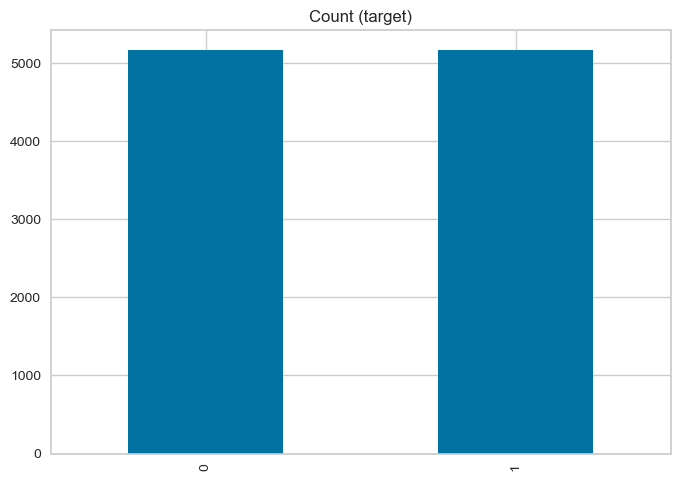

In [69]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.Churn.value_counts())

df_over.Churn.value_counts().plot(kind='bar', title='Count (target)');

In [70]:
df_over.reset_index(inplace=True)

In [71]:
df_over.drop(["index"], axis=1, inplace = True)

In [72]:
df_over

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.619718,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
3,0,0,1,0.295775,1,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0.126761,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1,0,0,0.000000,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
10322,0,0,0,0.014085,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
10323,0,0,1,0.042254,1,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
10324,0,1,0,0.281690,1,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [73]:
X_o = df_over.drop(columns = 'Churn')
y_o = df_over['Churn']

In [74]:
setup(data = X_o,target = y_o ,session_id = 125)

,Description,Value
0,Session id,125
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(10326, 26)"
4,Transformed data shape,"(10326, 26)"
5,Transformed train set shape,"(7228, 26)"
6,Transformed test set shape,"(3098, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [75]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8827,0.9585,0.9153,0.8595,0.8864,0.7653,0.7672,3.6580
rf,Random Forest Classifier,0.8798,0.9525,0.9275,0.8468,0.8853,0.7595,0.7632,2.4890
dt,Decision Tree Classifier,0.8484,0.8488,0.9150,0.8076,0.8578,0.6967,0.7032,0.8160
xgboost,Extreme Gradient Boosting,0.8484,0.9155,0.9042,0.8135,0.8564,0.6967,0.7013,1.6550
catboost,CatBoost Classifier,0.8316,0.8980,0.8849,0.7999,0.8401,0.6632,0.6673,3.5040
lightgbm,Light Gradient Boosting Machine,0.8273,0.8974,0.8769,0.7982,0.8356,0.6547,0.6581,1.0110
gbc,Gradient Boosting Classifier,0.7821,0.8656,0.8215,0.7619,0.7904,0.5642,0.5661,1.4570
ada,Ada Boost Classifier,0.7743,0.8545,0.8226,0.7504,0.7848,0.5487,0.5513,1.0200
lr,Logistic Regression,0.7696,0.8480,0.8074,0.7510,0.7781,0.5393,0.5410,0.7910
ridge,Ridge Classifier,0.7673,0.0000,0.8105,0.7462,0.7769,0.5346,0.5367,0.7720


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [76]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size = 0.3, random_state = 0,stratify=y_o)
print(f"shape of x train: {X_train_o.shape}")
print(f"shape of y train: {y_train_o.shape}")
print(f"shape of x test: {X_test_o.shape}")
print(f"shape of y train: {y_test_o.shape}")

shape of x train: (7228, 25)
shape of y train: (7228,)
shape of x test: (3098, 25)
shape of y train: (3098,)


# Method_3

In [77]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

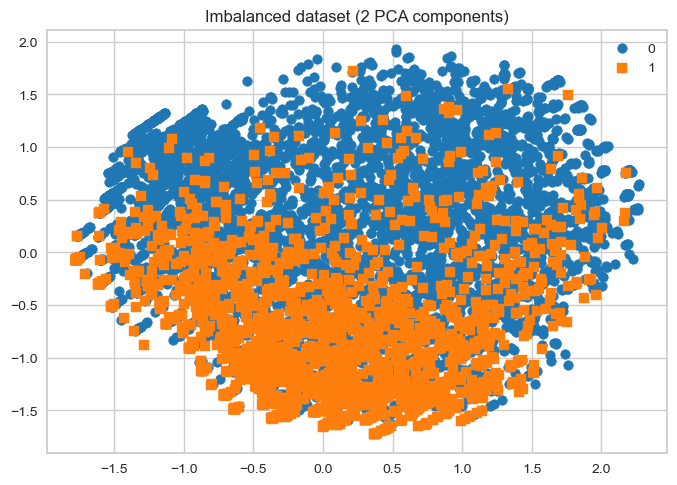

In [78]:
from sklearn.decomposition import PCA
X_p = df.drop(columns = 'Churn')
y_p = df['Churn']
pca = PCA(n_components=2)
X_p = pca.fit_transform(X_p)

plot_2d_space(X_p, y_p, 'Imbalanced dataset (2 PCA components)')

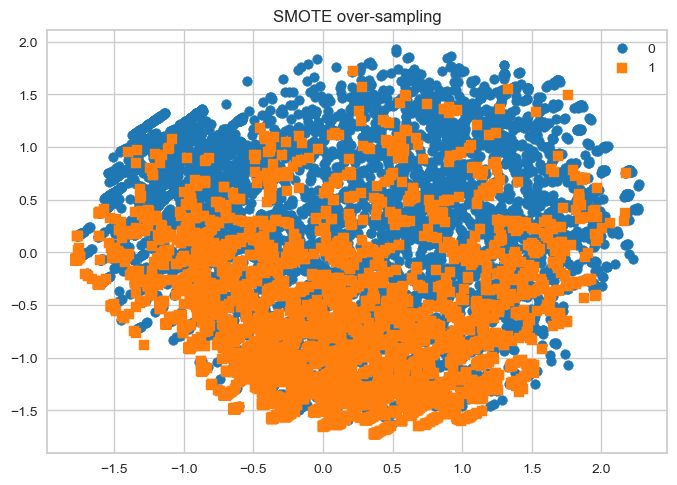

In [79]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_p, y_p)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [80]:
setup(data = X_sm,target = y_sm ,session_id = 123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(10326, 3)"
4,Transformed data shape,"(10326, 3)"
5,Transformed train set shape,"(7228, 3)"
6,Transformed test set shape,"(3098, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [81]:
best = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7726,0.8476,0.7894,0.7634,0.7760,0.5451,0.5457,2.9840
catboost,CatBoost Classifier,0.7681,0.8412,0.7972,0.7535,0.7746,0.5362,0.5373,2.7690
rf,Random Forest Classifier,0.7649,0.8437,0.7844,0.7550,0.7692,0.5299,0.5307,1.9520
knn,K Neighbors Classifier,0.7643,0.8322,0.8168,0.7394,0.7760,0.5285,0.5318,0.8770
gbc,Gradient Boosting Classifier,0.7630,0.8329,0.7900,0.7497,0.7691,0.5260,0.5270,1.4730
lightgbm,Light Gradient Boosting Machine,0.7613,0.8401,0.7991,0.7430,0.7699,0.5227,0.5245,1.0090
xgboost,Extreme Gradient Boosting,0.7571,0.8347,0.7891,0.7417,0.7644,0.5141,0.5155,1.3810
lr,Logistic Regression,0.7540,0.8261,0.7742,0.7443,0.7589,0.5080,0.5086,0.8480
ridge,Ridge Classifier,0.7540,0.0000,0.7820,0.7407,0.7607,0.5080,0.5090,1.2680
lda,Linear Discriminant Analysis,0.7540,0.8260,0.7820,0.7407,0.7607,0.5080,0.5090,0.8730


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [82]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0,stratify=y_sm)
print(f"shape of x train: {X_train_sm.shape}")
print(f"shape of y train: {y_train_sm.shape}")
print(f"shape of x test: {X_test_sm.shape}")
print(f"shape of y train: {y_test_sm.shape}")

shape of x train: (7228, 2)
shape of y train: (7228,)
shape of x test: (3098, 2)
shape of y train: (3098,)


# Method_4

In [83]:
X_smt = df.drop('Churn',axis='columns')
y_smt = df['Churn']

In [84]:
from imblearn.combine import SMOTETomek
#pca = PCA(n_components=2)
#X_smt = pca.fit_transform(X_smt)
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X_smt, y_smt)

In [85]:
print(len(y_smt))
print(len(X_smt))

9670
9670


In [86]:
setup(data = X_smt,target = y_smt ,session_id = 124)

,Description,Value
0,Session id,124
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(9670, 26)"
4,Transformed data shape,"(9670, 26)"
5,Transformed train set shape,"(6769, 26)"
6,Transformed test set shape,"(2901, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [87]:
best = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8565,0.9323,0.8738,0.8449,0.8590,0.7131,0.7138,1.8950
xgboost,Extreme Gradient Boosting,0.8512,0.9233,0.8780,0.8336,0.8552,0.7025,0.7036,1.7480
rf,Random Forest Classifier,0.8509,0.9268,0.8697,0.8386,0.8538,0.7019,0.7025,1.8440
catboost,CatBoost Classifier,0.8443,0.9215,0.8721,0.8263,0.8485,0.6886,0.6897,3.8460
lightgbm,Light Gradient Boosting Machine,0.8441,0.9191,0.8744,0.8246,0.8488,0.6883,0.6896,1.4290
lda,Linear Discriminant Analysis,0.8273,0.9065,0.8626,0.8061,0.8333,0.6546,0.6564,0.9530
ridge,Ridge Classifier,0.8236,0.0000,0.8644,0.7995,0.8306,0.6472,0.6495,0.9200
gbc,Gradient Boosting Classifier,0.8192,0.9002,0.8458,0.8032,0.8239,0.6383,0.6393,1.5420
lr,Logistic Regression,0.8173,0.8992,0.8496,0.7983,0.8231,0.6345,0.6359,0.9530
knn,K Neighbors Classifier,0.8168,0.8855,0.8995,0.7721,0.8309,0.6336,0.6426,1.3090


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [88]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size = 0.3, random_state = 0,stratify=y_smt)
print(f"shape of x train: {X_train_smt.shape}")
print(f"shape of y train: {y_train_smt.shape}")
print(f"shape of x test: {X_test_smt.shape}")
print(f"shape of y train: {y_test_smt.shape}")

shape of x train: (6769, 25)
shape of y train: (6769,)
shape of x test: (2901, 25)
shape of y train: (2901,)


### <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Now it's time to Model and choose the best one as my_model</p>

In [89]:
def parameter_finder (model, parameters):
    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        scoring = "f1",
                        n_jobs = -1)
    if i == 1 :
        X_train, X_test , y_train , y_test = X_train_smt, X_test_smt, y_train_smt, y_test_smt
    if i ==2 :
        X_train, X_test , y_train , y_test = X_train_sm, X_test_sm, y_train_sm, y_test_sm 
    if i ==3 :
        X_train, X_test , y_train , y_test = X_train_o, X_test_o, y_train_o, y_test_o
    if i ==4 :
        X_train, X_test , y_train , y_test = X_train_u, X_test_u, y_train_u, y_test_u
    
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    
    cr = classification_report(y_test, y_pred)
    model_name = str(model).split('(')[0]
    
    end = time.time()
    if i ==1:
        print("**" * 30)
        print("The Result of SMOTETomek Method (Method No.4) with 26 feature")
        print("**" * 30)
    if i ==2:
        print("**" * 30)
        print("The Result of SMOTE Method (Method No.3) with 2 combined feature")
        print("**" * 30)
    if i ==3:
        print("**" * 30)
        print("The Result of Oversampling Method (Method No.2)")
        print("**" * 30)
    if i ==4:
        print("**" * 30)
        print("The Result of Undersampling Method (Method No.1)")
        print("**" * 30)
        
        
        
    print (cr)
    print("--" * 10)
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(f1 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(f1 score) in the testing set is {test_score:0.2%} for {model_name} model.")

    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)

  
       
    return train_score, test_score,cr

In [87]:
lr = LogisticRegression(n_jobs = -1)
for i in range(1,5):
    param_lr = {'penalty': ['l1', 'l2', 'elasticnet'],
           "C" : [0.2,0.4,0.6,0.8,1],
           'class_weight' : [{0: 1, 1: 1.5},{0: 1, 1: 2}, {0: 1, 1: 3},{0: 1, 1: 4}],
           }

    lr_train_score, lr_test_score,cr = parameter_finder(lr, param_lr)
    i=i+1

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1451
           1       0.77      0.92      0.84      1450

    accuracy                           0.82      2901
   macro avg       0.83      0.82      0.82      2901
weighted avg       0.83      0.82      0.82      2901

--------------------
The best parameters for LogisticRegression model is: {'C': 1, 'class_weight': {0: 1, 1: 1.5}, 'penalty': 'l2'}
--------------------
(f1 score) in the training set is 82.66% for LogisticRegression model.
(f1 score) in the testing set is 83.79% for LogisticRegression model.
--------------------
Runtime of the program is: 4.79
************************************************************
The Result of SMOTE Method (Method No.3) with 2 combined feature
****************

In [88]:
lda=LinearDiscriminantAnalysis()
for i in range(1,5):
    param_lda = {"solver" : ['svd', 'lsqr', 'eigen'],
           
           }
    lda_train_score, lda_test_score,cr = parameter_finder(lda, param_lda)
    i=i+1

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1451
           1       0.82      0.86      0.84      1450

    accuracy                           0.83      2901
   macro avg       0.84      0.83      0.83      2901
weighted avg       0.84      0.83      0.83      2901

--------------------
The best parameters for LinearDiscriminantAnalysis model is: {'solver': 'svd'}
--------------------
(f1 score) in the training set is 82.82% for LinearDiscriminantAnalysis model.
(f1 score) in the testing set is 83.90% for LinearDiscriminantAnalysis model.
--------------------
Runtime of the program is: 0.74
************************************************************
The Result of SMOTE Method (Method No.3) with 2 combined feature
********************************

In [89]:
GBC = GaussianNB()
for i in range(1,5):
    GBC_train_score, GBC_test_score,cr = parameter_finder(GBC, {})
    i+=1

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1451
           1       0.77      0.83      0.80      1450

    accuracy                           0.79      2901
   macro avg       0.79      0.79      0.79      2901
weighted avg       0.79      0.79      0.79      2901

--------------------
The best parameters for GaussianNB model is: {}
--------------------
(f1 score) in the training set is 78.84% for GaussianNB model.
(f1 score) in the testing set is 79.64% for GaussianNB model.
--------------------
Runtime of the program is: 0.10
************************************************************
The Result of SMOTE Method (Method No.3) with 2 combined feature
************************************************************
              precision    recall 

In [90]:
RLC=RidgeClassifier()
for i in range(1,5):
    param_RLC = {'alpha': [0.001, 0.01, 0.1,0.11,0.13,0.15,0.2,0.5,1, 10],
             'class_weight' : [{0: 1, 1: 1.5},{0: 1, 1: 2}, {0: 1, 1: 3},{0: 1, 1: 4}]
           }
    RLC_train_score, RLC_test_score,cr = parameter_finder(RLC, param_RLC)
    i+=1

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1451
           1       0.77      0.91      0.84      1450

    accuracy                           0.82      2901
   macro avg       0.83      0.82      0.82      2901
weighted avg       0.83      0.82      0.82      2901

--------------------
The best parameters for RidgeClassifier model is: {'alpha': 0.001, 'class_weight': {0: 1, 1: 1.5}}
--------------------
(f1 score) in the training set is 83.04% for RidgeClassifier model.
(f1 score) in the testing set is 83.73% for RidgeClassifier model.
--------------------
Runtime of the program is: 1.42
************************************************************
The Result of SMOTE Method (Method No.3) with 2 combined feature
**********************************

In [91]:
DTC = DecisionTreeClassifier()
for i in range(1,5):
    param_DTC = {'criterion': ["gini", "entropy", "log_loss"],
             'splitter' : ["best", "random"],
             'max_depth' : [2,4,6,8,10],
             'min_samples_leaf' : [2,4,6,8,10],
              'class_weight' : [{0: 1, 1: 1.5},{0: 1, 1: 2}, {0: 1, 1: 3},{0: 1, 1: 4}]
           }


    DTC_train_score, DTC_test_score,cr = parameter_finder(DTC, param_DTC)
    i+=1

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1451
           1       0.75      0.93      0.83      1450

    accuracy                           0.81      2901
   macro avg       0.83      0.81      0.81      2901
weighted avg       0.83      0.81      0.81      2901

--------------------
The best parameters for DecisionTreeClassifier model is: {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'splitter': 'random'}
--------------------
(f1 score) in the training set is 87.06% for DecisionTreeClassifier model.
(f1 score) in the testing set is 83.07% for DecisionTreeClassifier model.
--------------------
Runtime of the program is: 21.31
************************************************************
The Result o

In [92]:
ABC= AdaBoostClassifier()
for i in range(1,5):
    param_ABC = {'learning_rate': [0.2,0.4,0.6,0.8,1,1.2],
             'algorithm' : ['SAMME', 'SAMME.R']
           }


    ABC_train_score, ABC_test_score,cr = parameter_finder(ABC, param_ABC)
    i+=1

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.85      0.77      0.80      1451
           1       0.79      0.86      0.82      1450

    accuracy                           0.81      2901
   macro avg       0.82      0.81      0.81      2901
weighted avg       0.82      0.81      0.81      2901

--------------------
The best parameters for AdaBoostClassifier model is: {'algorithm': 'SAMME.R', 'learning_rate': 0.8}
--------------------
(f1 score) in the training set is 81.47% for AdaBoostClassifier model.
(f1 score) in the testing set is 82.20% for AdaBoostClassifier model.
--------------------
Runtime of the program is: 8.02
************************************************************
The Result of SMOTE Method (Method No.3) with 2 combined feature
***************************

In [93]:
lgb= LGBMClassifier(silent=True)
for i in range(1,5):
    param_lgb = {'class_weight' : [{0: 1, 1: 1.5},{0: 1, 1: 2}, {0: 1, 1: 3},{0: 1, 1: 4}],
             'learning_rate': [0.2,0.4,0.6,0.8,1,1.2],
              'max_depth': [3,4,5],
             
           }


    lgb_train_score, lgb_test_score,cr = parameter_finder(lgb, param_lgb)
    i+=1

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3385, number of negative: 3384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 6769, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600071 -> initscore=0.405761
[LightGBM] [Info] Start training from score 0.405761
[LightGBM] 

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600000 -> initscore=0.405465
[LightGBM] [Info] Start training from score 0.405465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600000 -> initscore=0.405465
[LightGBM] [Info] Start training from score 0.405465
[LightGBM] 

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1308, number of negative: 1308
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [74]:
rfc= RandomForestClassifier()
for i in range(1,5):
    param_rfc = {'criterion' : ["gini", "entropy"],
             'class_weight' : [{0: 1, 1: 1.5},{0: 1, 1: 2}, {0: 1, 1: 3}],
             'n_estimators': [100, 200],
             'min_samples_split': [1,2,4],
             'min_samples_leaf': [1,2,4],
              'max_leaf_nodes': [4,20,50,None]           
           }
    rfc_train_score, rfc_test_score,cr = parameter_finder(rfc, param_rfc)
    i+=1

--------------------
The Result of SMOTETomek Method (Method No.4) with 26 feature
--------------------
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1415
           1       0.85      0.90      0.87      1414

    accuracy                           0.87      2829
   macro avg       0.87      0.87      0.87      2829
weighted avg       0.87      0.87      0.87      2829

--------------------
The best parameters for RandomForestClassifier model is: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
--------------------
(f1 score) in the training set is 99.86% for RandomForestClassifier model.
(f1 score) in the testing set is 87.40% for RandomForestClassifier model.
--------------------
Runtime of the program is: -12.15
--------------------
The Result of SMOTE Method (Method No.3) with 2 combined feature
--------------------
            

In [94]:
rfc= RandomForestClassifier(random_state=1)
i=1
param_rfc = {'criterion' : ["entropy"],
             'class_weight' : [ {0: 1, 1: 1}],
             'n_estimators': [200],
             'min_samples_split': [2],
             'min_samples_leaf': [1],
              'max_leaf_nodes': [None]           
           }
rfc_train_score, rfc_test_score,cr = parameter_finder(rfc, param_rfc)

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1451
           1       0.85      0.88      0.86      1450

    accuracy                           0.86      2901
   macro avg       0.86      0.86      0.86      2901
weighted avg       0.86      0.86      0.86      2901

--------------------
The best parameters for RandomForestClassifier model is: {'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
--------------------
(f1 score) in the training set is 99.78% for RandomForestClassifier model.
(f1 score) in the testing set is 86.25% for RandomForestClassifier model.
--------------------
Runtime of the program is: 7.99


In [ ]:
rfc= RandomForestClassifier()
i=2
param_rfc = {'criterion' : ["gini", "entropy"],
             'class_weight' : [{0: 1, 1: 1.5},{0: 1, 1: 2}, {0: 1, 1: 3}],
             'n_estimators': [100, 200],
             'min_samples_split': [1,2,4],
             'min_samples_leaf': [1,2,4],
              'max_leaf_nodes': [4,20,50,None]           
           }
rfc_train_score, rfc_test_score,cr = parameter_finder(rfc, param_rfc)

In [95]:
xgb = XGBClassifier()

for i in range(1,5):
    param_xgb = {'n_estimators': [100, 200],
        'learning_rate': [0.05,0.1],
        'booster': ['gbtree', 'gblinear'],
        'gamma': [0, 0.5],
        'reg_alpha': [0, 1],
        'reg_lambda': [0.5, 1],
        'base_score': [ 0.5, 1]
           }

    xgb_train_score,xgb_test_score,cr = parameter_finder(xgb, param_xgb)
    i+=1

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1451
           1       0.84      0.88      0.86      1450

    accuracy                           0.86      2901
   macro avg       0.86      0.86      0.86      2901
weighted avg       0.86      0.86      0.86      2901

--------------------
The best parameters for XGBClassifier model is: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0.5}
--------------------
(f1 score) in the training set is 94.64% for XGBClassifier model.
(f1 score) in the testing set is 85.90% for XGBClassifier model.
--------------------
Runtime of the program is: 81.88
************************************************************
The Result of SMOTE Me

In [96]:
xgb = XGBClassifier()
i=1
param_xgb = {'n_estimators': [250],
        'learning_rate': [0.11],
        'booster': ['gbtree'],
        'gamma': [0.8],
        'reg_alpha': [0.9],
        'reg_lambda': [0.9],
        'base_score': [0.4]
     
           }

xgb_train_score,xgb_test_score,cr = parameter_finder(xgb, param_xgb)


************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1451
           1       0.84      0.87      0.85      1450

    accuracy                           0.85      2901
   macro avg       0.85      0.85      0.85      2901
weighted avg       0.85      0.85      0.85      2901

--------------------
The best parameters for XGBClassifier model is: {'base_score': 0.4, 'booster': 'gbtree', 'gamma': 0.8, 'learning_rate': 0.11, 'n_estimators': 250, 'reg_alpha': 0.9, 'reg_lambda': 0.9}
--------------------
(f1 score) in the training set is 94.85% for XGBClassifier model.
(f1 score) in the testing set is 85.36% for XGBClassifier model.
--------------------
Runtime of the program is: 4.42


In [97]:
etc= ExtraTreesClassifier()
for i in range(1,5):
    param_etc = {'criterion' : ["gini", "entropy", "log_loss"],
             'class_weight' : [{0: 1, 1: 1.5},{0: 1, 1: 2}, {0: 1, 1: 3},{0: 1, 1: 4}],
             
              'max_depth': [3,4,5],
             
           }


    etc_train_score, etc_test_score,cr = parameter_finder(etc, param_etc)
    i+=1

************************************************************
The Result of SMOTETomek Method (Method No.4) with 26 feature
************************************************************
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1451
           1       0.72      0.91      0.81      1450

    accuracy                           0.78      2901
   macro avg       0.80      0.78      0.78      2901
weighted avg       0.80      0.78      0.78      2901

--------------------
The best parameters for ExtraTreesClassifier model is: {'class_weight': {0: 1, 1: 1.5}, 'criterion': 'log_loss', 'max_depth': 5}
--------------------
(f1 score) in the training set is 80.33% for ExtraTreesClassifier model.
(f1 score) in the testing set is 80.61% for ExtraTreesClassifier model.
--------------------
Runtime of the program is: 15.66
************************************************************
The Result of SMOTE Method (Method No.3) with 2 combined f

In [98]:
lgb= LGBMClassifier()
i=3
param_lgb = {'class_weight' : [{0: 1, 1: 1.5}],
             'learning_rate': [0.75],
             'max_depth': [7],
             'reg_alpha': [1],
             'reg_lambda': [1],
             'num_leaves' : [30],
           }


lgb_train_score, lgb_test_score,cr = parameter_finder(lgb, param_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600000 -> initscore=0.405465
[LightGBM] [Info] Start training from score 0.405465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [90]:
X_train, X_test , y_train , y_test=X_train_o, X_test_o, y_train_o, y_test_o

my_model=LGBMClassifier(class_weight={0: 1, 1: 1.5},learning_rate=0.75,
                      max_depth=6,reg_alpha=1,
                      reg_lambda=1,num_leaves=30)


In [91]:
my_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600000 -> initscore=0.405465
[LightGBM] [Info] Start training from score 0.405465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(boosting_type='gbdt', class_weight={0: 1, 1: 1.5},
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.75, max_depth=6, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=None, num_leaves=30, objective=None, random_state=None,
               reg_alpha=1, reg_lambda=1, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [92]:
y_pred = my_model.predict(X_test)
train_score =my_model.score(X_train, y_train)
test_score = my_model.score(X_test, y_test)
cr = classification_report(y_test, y_pred)

In [93]:
print(f"(R2 score) in the training set is {train_score:0.2%} for CatBoostRegressor model.")
print(f"(R2 score) in the testing set is {test_score:0.2%} for CatBoostRegressor model.")
print (cr) 

(R2 score) in the training set is 95.41% for CatBoostRegressor model.
(R2 score) in the testing set is 84.54% for CatBoostRegressor model.
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1549
           1       0.79      0.93      0.86      1549

    accuracy                           0.85      3098
   macro avg       0.86      0.85      0.84      3098
weighted avg       0.86      0.85      0.84      3098



In [94]:
joblib.dump(my_model, 'LGBMpipe.joblib') 

['LGBMpipe.joblib']

In [95]:
 # load the model from disk
loaded_model = joblib.load('LGBMpipe.joblib')
result = loaded_model.score(X_test, y_test)
print(result*100)

84.53841187863136


In [96]:
pip freeze > requirement.txt

^C
Note: you may need to restart the kernel to use updated packages.
